In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORT MODULES

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Load the Dataset

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/project/train/train'
TEST_DIR = '/content/drive/MyDrive/project/test/test'

In [ ]:
import pandas as pd
import os

def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):  # Ensure it's a directory
            for filename in os.listdir(label_path):
                image_path = os.path.join(label_path, filename)
                image_paths.append(image_path)
                labels.append(label)
            print(label, "Completed")

    return image_paths, labels

# Define your directory paths
TRAIN_DIR = '/content/drive/MyDrive/project/train/train'

# Convert into DataFrame
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

# Shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)

# Display the head of the DataFrame
print(train.head())


disgust Completed
neutral Completed
sad Completed
angry Completed
fear Completed
surprise Completed
happy Completed
                                               image    label
0  /content/drive/MyDrive/project/train/train/fea...     fear
1  /content/drive/MyDrive/project/train/train/fea...     fear
2  /content/drive/MyDrive/project/train/train/hap...    happy
3  /content/drive/MyDrive/project/train/train/hap...    happy
4  /content/drive/MyDrive/project/train/train/neu...  neutral


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

surprise Completed
neutral Completed
sad Completed
happy Completed
disgust Completed
fear Completed
angry Completed


,image,label
0,/content/drive/MyDrive/project/test/test/surpr...,surprise
1,/content/drive/MyDrive/project/test/test/surpr...,surprise
2,/content/drive/MyDrive/project/test/test/surpr...,surprise
3,/content/drive/MyDrive/project/test/test/surpr...,surprise
4,/content/drive/MyDrive/project/test/test/surpr...,surprise


Exploratory Data Analysis

<Axes: xlabel='count', ylabel='label'>

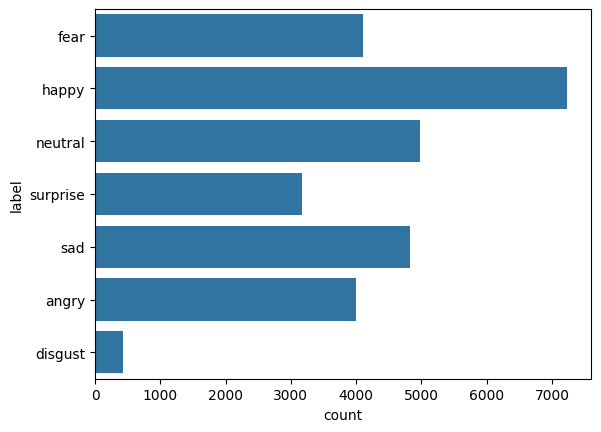

In [ ]:
sns.countplot(train['label'])

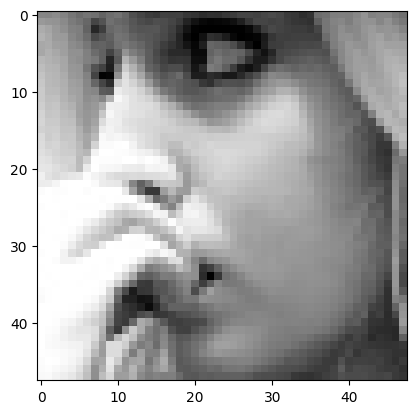

In [ ]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

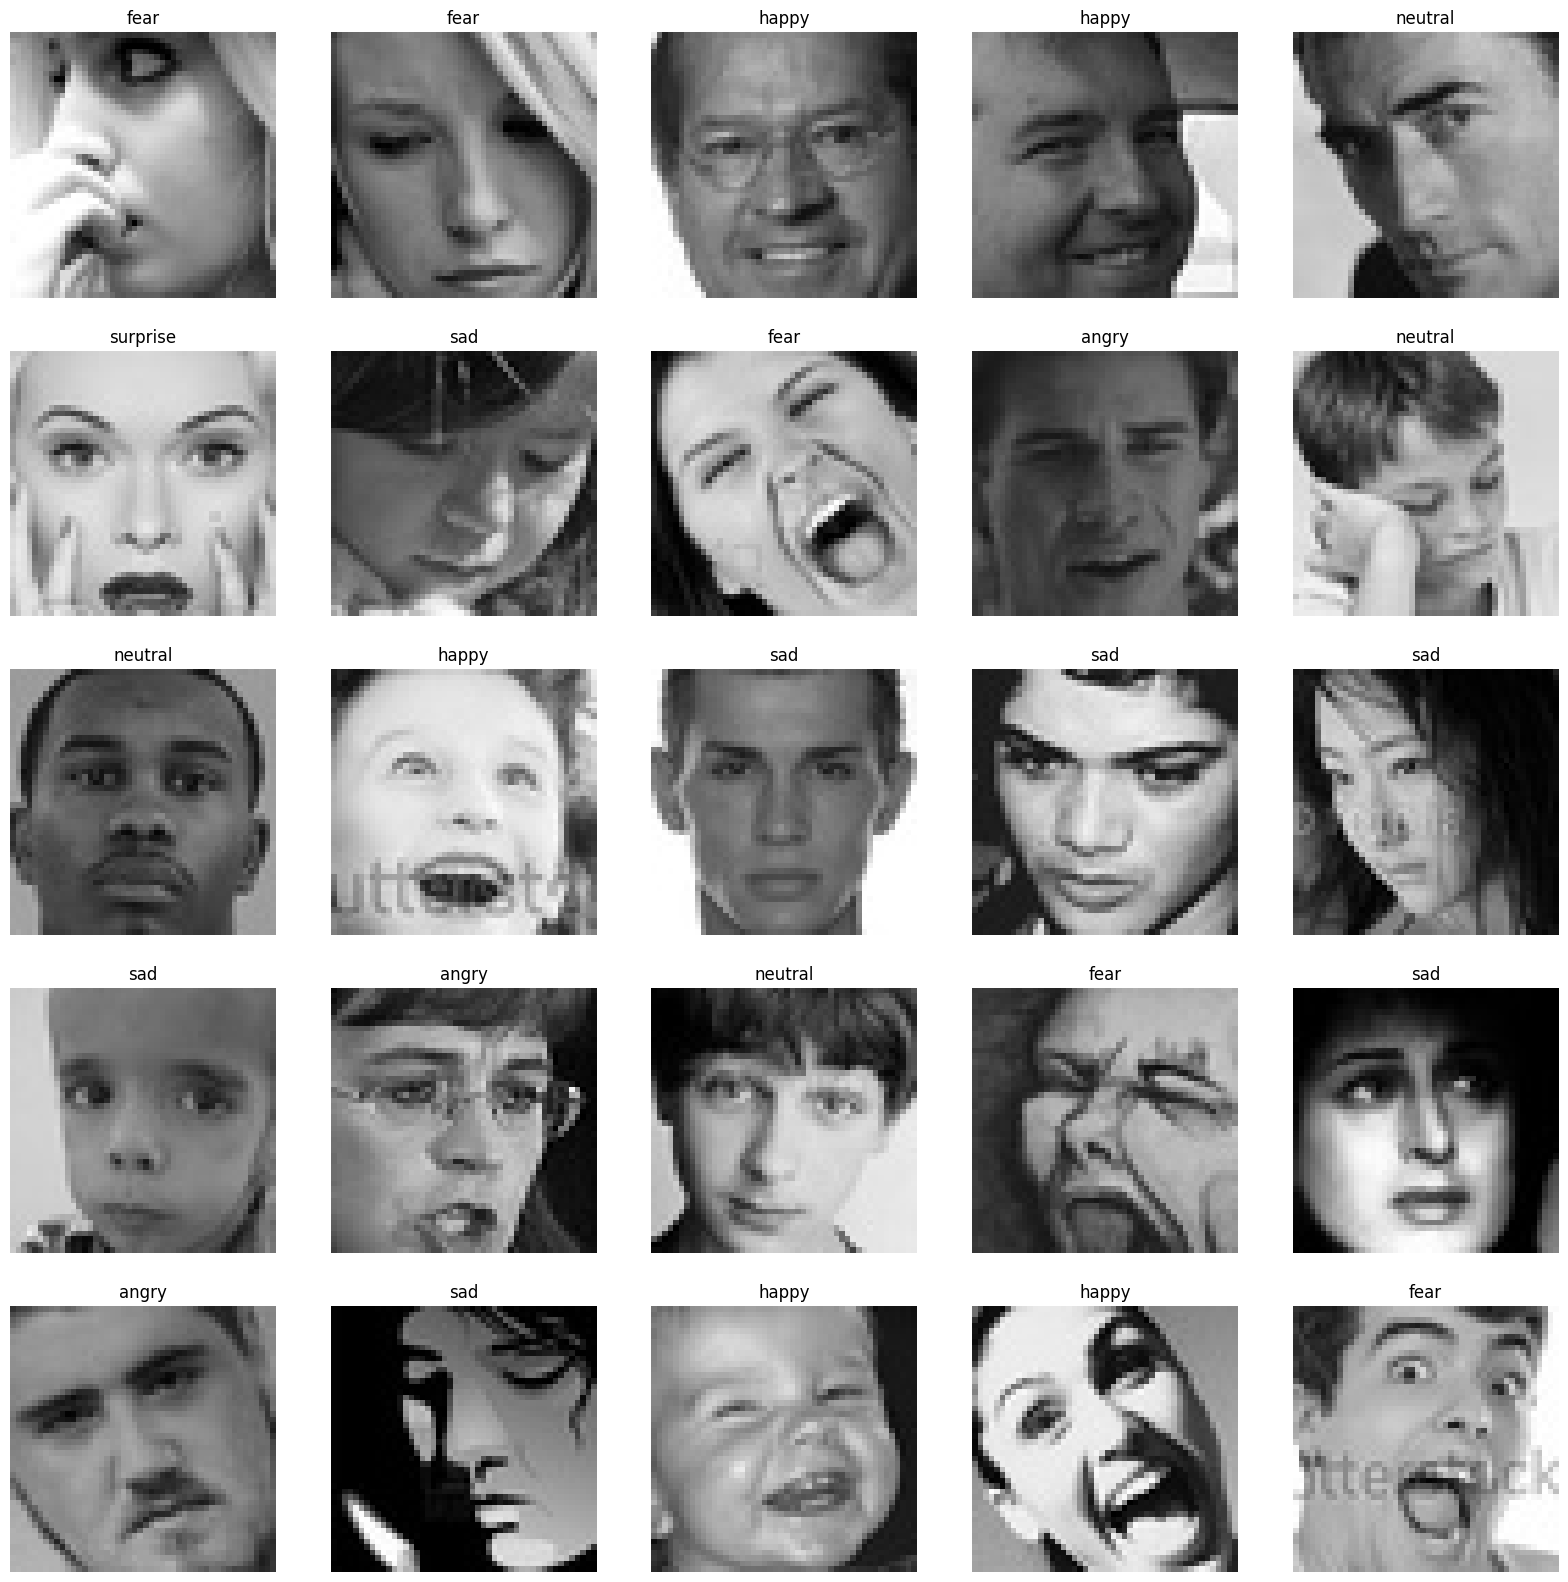

In [ ]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

Feature Extraction

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/28739 [00:00<?, ?it/s]

In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7198 [00:00<?, ?it/s]

In [ ]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
# config
input_shape = (48, 48, 1)
output_class = 7

Model Creation

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/10
225/225 [==============================] - 1646s 7s/step - loss: 1.8217 - accuracy: 0.2475 - val_loss: 1.8128 - val_accuracy: 0.2492
Epoch 2/10
225/225 [==============================] - 1627s 7s/step - loss: 1.7943 - accuracy: 0.2518 - val_loss: 1.7452 - val_accuracy: 0.2902
Epoch 3/10
225/225 [==============================] - 1618s 7s/step - loss: 1.6952 - accuracy: 0.3094 - val_loss: 1.5778 - val_accuracy: 0.4001
Epoch 4/10
225/225 [==============================] - 1614s 7s/step - loss: 1.5458 - accuracy: 0.3957 - val_loss: 1.4241 - val_accuracy: 0.4435
Epoch 5/10
225/225 [==============================] - 1617s 7s/step - loss: 1.4591 - accuracy: 0.4340 - val_loss: 1.3402 - val_accuracy: 0.4829
Epoch 6/10
225/225 [==============================] - 1615s 7s/step - loss: 1.4019 - accuracy: 0.4579 - val_loss: 1.2957 - val_accuracy: 0.4972
Epoch 7/10
225/225 [==============================] - 1634s 7s/step - loss: 1.3625 - accuracy: 0.4772 - val_loss: 1.2584 - val_accuracy:

Plot the Results

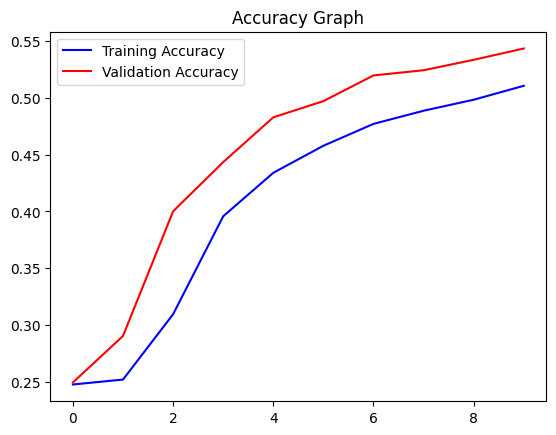

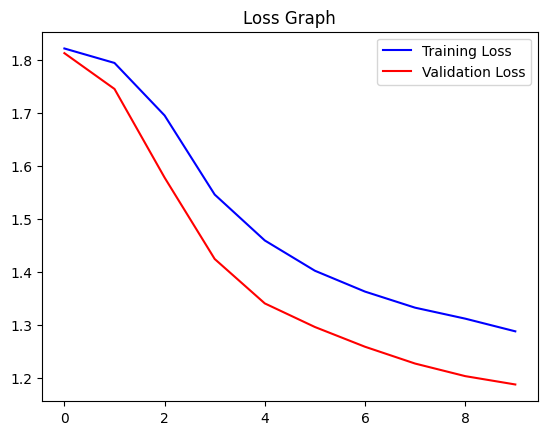

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Test With Image Data

Original Output: sad
1/1 [==============================] - 1s 1s/step
Predicted Output: sad


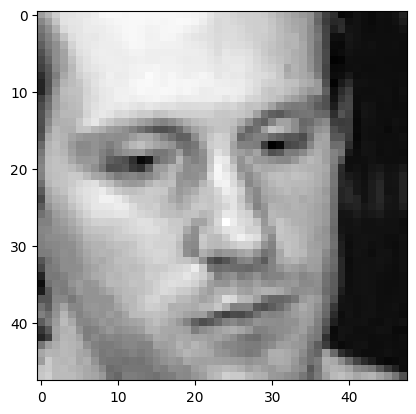

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: angry
1/1 [==============================] - 0s 191ms/step
Predicted Output: angry


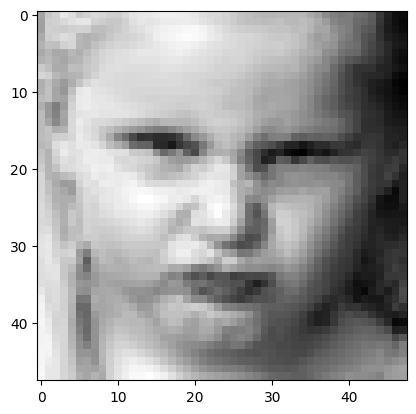

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: sad
1/1 [==============================] - 0s 154ms/step
Predicted Output: angry


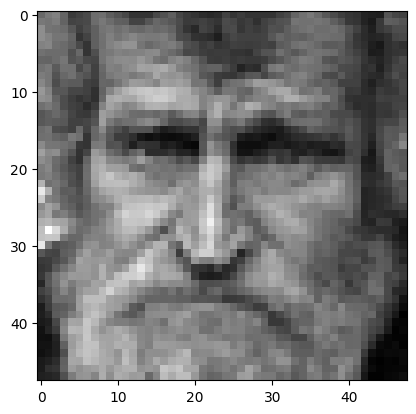

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [ ]:
model.save('/content/drive/MyDrive/majorproject.h5')